## Introduction

Dans le contexte de l'apprentissage non supervisé notre objectif est de connaître les caracteristiques communs qui pourrait définir un bons vins.
Pour remplir cette objectif nous allons étudier une base de donnée "Wine Qulaity" qui contient diverses propriétés physico-chimiques d'échantillons de vin rouge. 
Ces propriétés comprennent plusieurs caracteristique de vins.
Nous nous concentrerons sur la qualité du vin (quality of the wine), notée sur une échelle de 0 à 10.

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import umap

___
### Étape 1 : Chargement de l'ensemble de données
Dans cette étape, nous allons charger l'ensemble de données Wine Quality à partir de l'URL fournie à l'aide de Pandas, une puissante bibliothèque de manipulation de données en Python.

In [55]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

print("Data sample:")
print(data.head())

Data sample:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      

__Explication :__ Nous utilisons la fonction read_csv de la bibliothèque Pandas pour charger l'ensemble de données dans un DataFrame. Le sep=';' Le paramètre spécifie que l'ensemble de données est séparé par des points-virgules. Nous affichons ensuite les premières lignes de l'ensemble de données pour comprendre sa structure et son contenu.
___

### Étape 2 : Analyse statistique de base
Au cours de cette étape, nous effectuerons une analyse statistique de base de l'ensemble de données pour mieux comprendre ses caractéristiques numériques.

In [56]:
print("analyse statistique:")
print(data.describe(), end='')

analyse statistique:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000         

__Explication :__ Nous utilisons la fonction décrire pour générer des statistiques descriptives des colonnes numériques de l'ensemble de données. Cela inclut des mesures telles que la moyenne, l’écart type, le minimum, le maximum et les quartiles.
___

### Étape 3 : Vérification des valeurs manquantes
Dans cette étape, nous vérifierons s'il manque des valeurs dans l'ensemble de données.

In [57]:
print("\nValeurs manquantes:")
print(data.isnull().sum())


Valeurs manquantes:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


__Explication :__ Nous utilisons la fonction isnull pour identifier les valeurs manquantes dans l'ensemble de données, puis utilisons sum pour compter le nombre de valeurs manquantes pour chaque colonne. Cela nous aide à déterminer si une imputation de données ou un traitement des valeurs manquantes est nécessaire.
___

### Étape 4 : Visualiser la distribution de la variable cible
Dans cette étape, nous allons visualiser la distribution de la variable cible, qui dans ce cas est la qualité du vin.

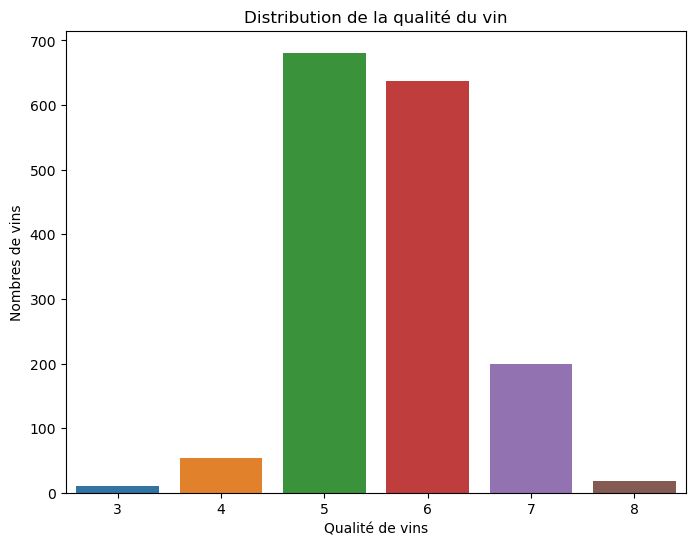

In [58]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data)
plt.title('Distribution de la qualité du vin')
plt.xlabel('Qualité de vins')
plt.ylabel('Nombres de vins')
plt.show()

__Explication :__ Nous utilisons la fonction countplot de la bibliothèque Seaborn pour créer un graphique à barres de la distribution des notes de qualité du vin. Cette visualisation nous aide à comprendre la répartition des qualités du vin dans l'ensemble de données.
___

### Étape 5 : Visualiser les corrélations entre les fonctionnalités
Dans cette étape, nous visualiserons les corrélations entre les différentes caractéristiques de l'ensemble de données à l'aide d'une carte thermique.

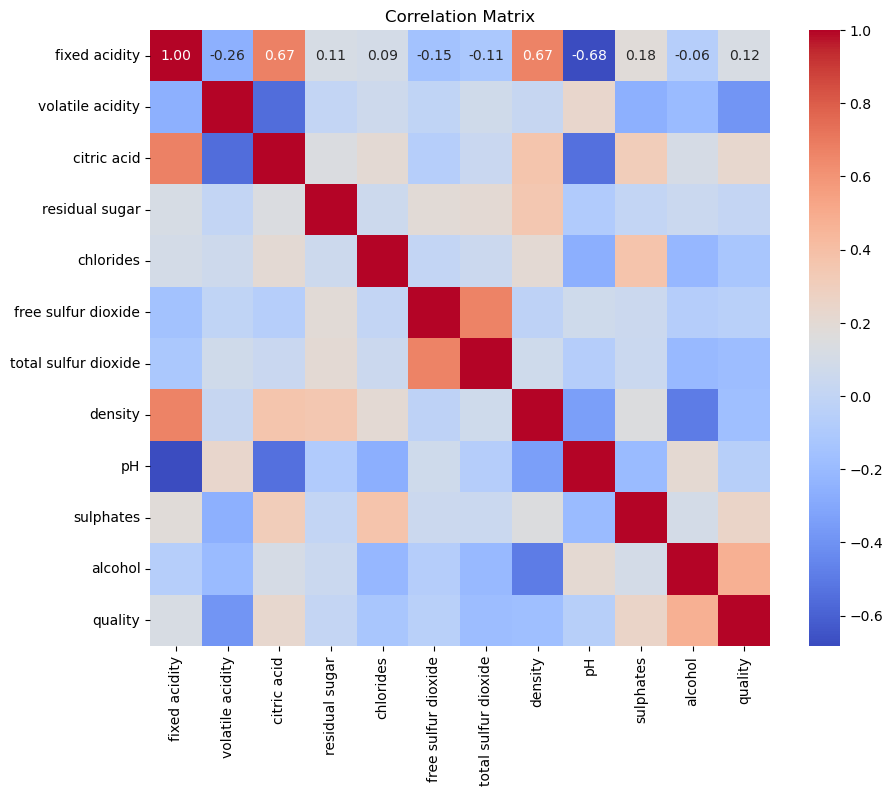

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

__Explication :__ Nous utilisons la fonction heatmap de Seaborn pour créer une heatmap de la matrice de corrélation entre les différentes caractéristiques de l'ensemble de données. Cette visualisation nous aide à identifier les relations et les dépendances entre les différentes caractéristiques.
___

### Étape 6 : Prétraitement des données
Dans cette étape, nous allons prétraiter les données en standardisant les fonctionnalités.

In [60]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('quality', axis=1))

__Explication :__ Nous utilisons la classe StandardScaler de scikit-learn pour standardiser les caractéristiques numériques de l'ensemble de données. La standardisation garantit que chaque fonctionnalité a une moyenne de 0 et un écart type de 1, ce qui est une exigence courante pour de nombreux algorithmes d'apprentissage automatique.
Puis nous traitons toutes les valeurs sauf les valeurs de "qualité"
___

### Étape 7 : Réduction de la dimensionnalité avec PCA
Dans cette étape, nous effectuerons une réduction de dimensionnalité à l’aide de l’analyse en composantes principales (ACP).

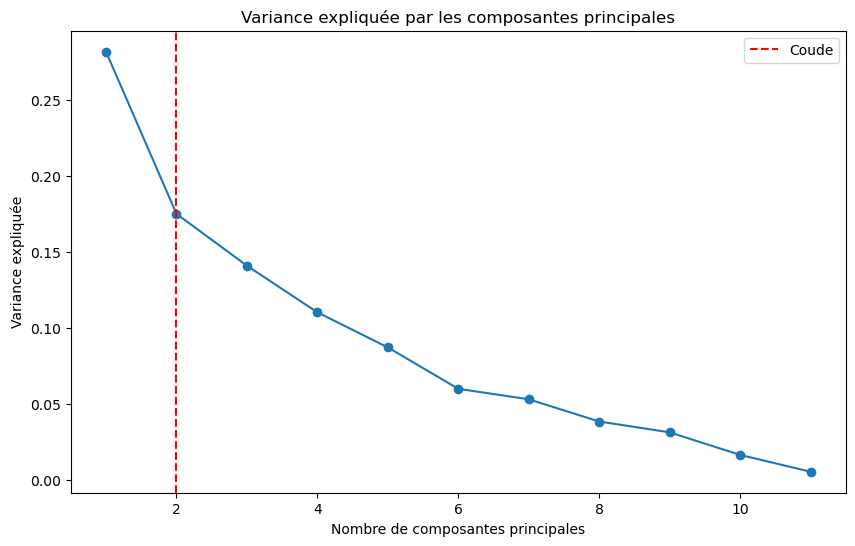

In [108]:
X = data.drop(columns=["quality"]) 
y = data["quality"] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'analyse en composantes principales (PCA)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Tracer le graphique de variance expliquée par composante
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée')
plt.title('Variance expliquée par les composantes principales')

plt.axvline(x=2, color='r', linestyle='--', label='Coude')
plt.legend()
plt.show()





D'apres la methode Elbow, la plus grande diminution se situe au niveau de 2 composantes principales, deux composantes principales capturent ensemble 2 unités de variance dans nos données.

<Figure size 1200x600 with 0 Axes>

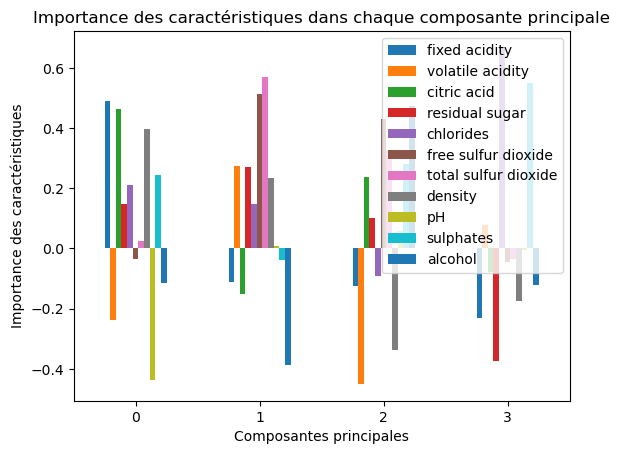

In [150]:
components_df = pd.DataFrame(components, columns=X.columns)

plt.figure(figsize=(12, 6))
components_df.plot(kind='bar')
plt.xlabel('Composantes principales')
plt.ylabel('Importance des caractéristiques')
plt.title('Importance des caractéristiques dans chaque composante principale')
plt.xticks(rotation=0)
plt.show()


__Explication :__ Nous utilisons la classe PCA de scikit-learn pour effectuer une analyse en composantes principales (ACP) sur les données standardisées. La PCA réduit la dimensionnalité de l'ensemble de données tout en préservant autant de variance que possible.
___

### Étape 8 : Clustering avec K-means
Dans cette étape, nous appliquerons l'algorithme de clustering K-means pour identifier les regroupements naturels au sein des données.

/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kme

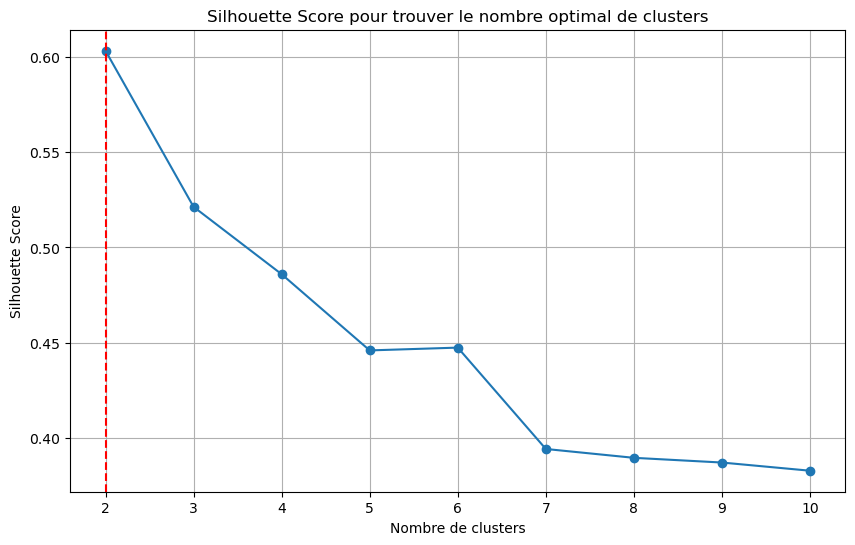

In [128]:

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score pour trouver le nombre optimal de clusters')
plt.xticks(range(2, 11))
plt.axvline(x=2, color='r', linestyle='--', label='best score')

plt.grid()
plt.show()


/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


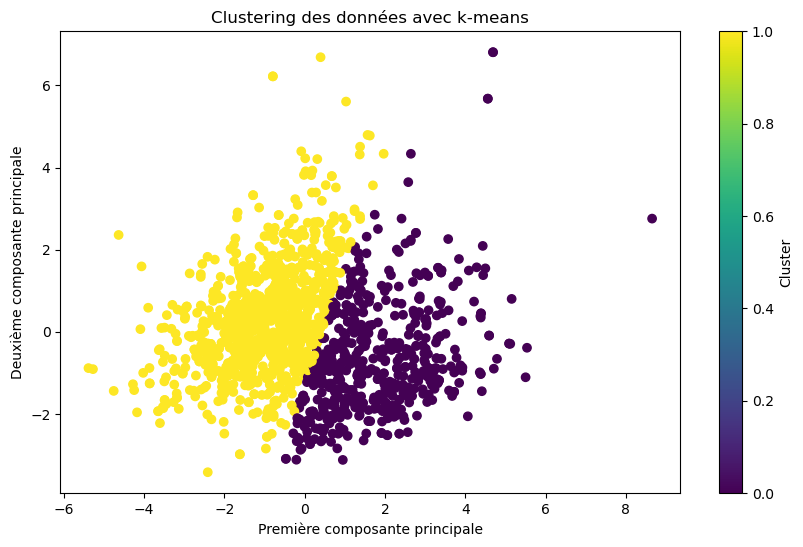

In [131]:

num_clusters = 2 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_pca[:, :2])  

cluster_labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Clustering des données avec k-means')
plt.colorbar(label='Cluster')
plt.show()


__Explication :__ Nous utilisons la classe KMeans de scikit-learn pour appliquer l'algorithme de clustering K-means aux données standardisées. K-means divise les données en n_clusters en fonction de la similarité.
___

### Étape 9 : Visualisation des clusters
Dans cette étape, nous allons essayer de mieux visualiser les clusters obtenus précédemment.

Text(0.5, 1.0, 't-SNE 2D')

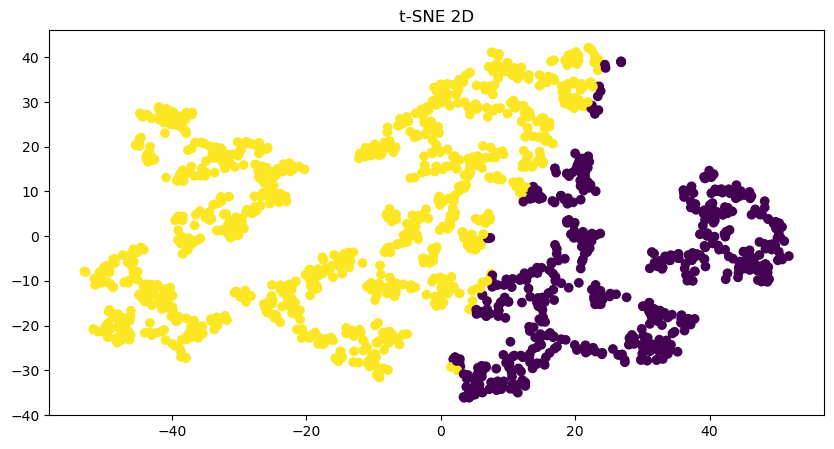

In [140]:
tsne_2d = TSNE(n_components=2)
data_2d_tsne = tsne_2d.fit_transform(X_pca[:, :2])

plt.figure(figsize=(10, 5))
plt.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c=cluster_labels)
plt.title("t-SNE 2D")

Text(0.5, 1.0, 'UMAP 2D')

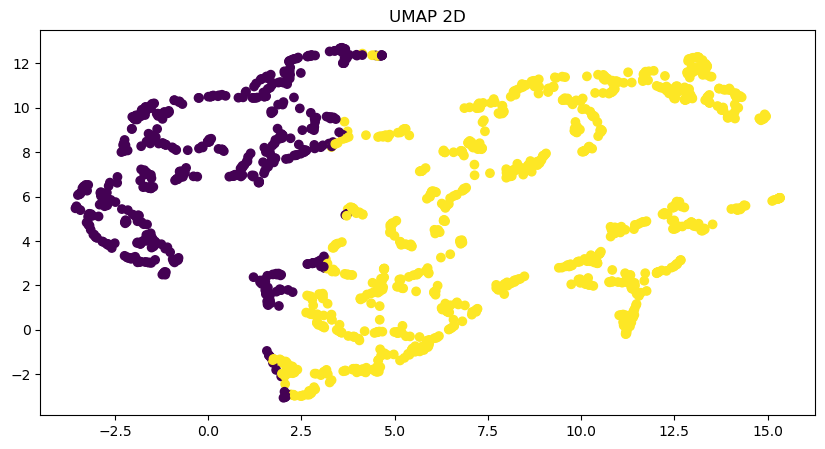

In [143]:
umap_2d = umap.UMAP(n_components=2)
data_2d_umap = umap_2d.fit_transform(X_pca[:, :2])

plt.figure(figsize=(10, 5))
plt.scatter(data_2d_umap[:, 0], data_2d_umap[:, 1], c=cluster_labels)
plt.title("UMAP 2D")

__Explication :__ Nous avons tester un affichage umap et t-sne afin de voir s'il était possible de mieux concentrer les clusters, ça n'a pas apporter grand chose.
___

### Étape 10 : Etude des clusters
Dans cette étape, nous allons étudier les labels obtenus dans les clusters que nous avons pu regrouper.

In [148]:
X_with_clusters = pd.concat([X, pd.DataFrame({'Cluster': cluster_labels})], axis=1)

cluster_stats = X_with_clusters.groupby('Cluster').describe()

print(cluster_stats)

cluster_means = X_with_clusters.groupby('Cluster').mean()
print(cluster_means)

        fixed acidity                                                  \
                count       mean       std  min  25%  50%   75%   max   
Cluster                                                                 
0               565.0  10.015752  1.586942  6.4  8.8  9.9  10.9  15.9   
1              1034.0   7.392843  0.938726  4.6  6.8  7.3   7.9  10.1   

        volatile acidity            ... sulphates       alcohol             \
                   count      mean  ...       75%   max   count       mean   
Cluster                             ...                                      
0                  565.0  0.419301  ...      0.81  2.00   565.0  10.570914   
1                 1034.0  0.587118  ...      0.66  1.17  1034.0  10.342150   

                                               
              std  min  25%   50%   75%   max  
Cluster                                        
0        1.085963  8.4  9.6  10.5  11.3  14.9  
1        1.046133  9.0  9.5  10.0  11.0  14.0  

[2

__Explication :__ Nous avons pu afficher des données qui permettent de savoir ce qui fait qu'un vin est de meilleur qualité.
___

### Conclusion
Dans cette analyse, nous avons exploré l'ensemble de données Wine Quality à l'aide de diverses techniques d'exploration de données et d'apprentissage non supervisé. Nous avons visualisé la distribution des qualités du vin, analysé les corrélations entre différentes caractéristiques et appliqué des algorithmes de réduction de dimensionnalité et de regroupement pour identifier des modèles au sein de l'ensemble de données. Le score silhouette a été utilisé pour évaluer les performances de regroupement et les résultats ont été visualisés en deux dimensions à l'aide de la PCA. Cette analyse fournit un aperçu de la structure de l'ensemble de données sur la qualité du vin et démontre l'application de techniques d'apprentissage non supervisé pour l'analyse exploratoire des données.